#Semantic change detection task 2021-2022<br/>

##2.0_Cade_diacronico<br/>

Matteo Cesaro - matteo.t.cesaro@gmail.com<br/>

# Mounting drive and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


It is necessary to install ``CADE`` on google colab.

https://cade.readthedocs.io/en/latest/readme.html

This package contains Python code to generate compass aligned distributional embeddings (CADE). Comparing word vectors in different corpora requires alignment.

In [2]:
!pip install -U cade
!pip install git+https://github.com/valedica/gensim.git

     |████████████████████████████████| 99 kB 2.7 MB/s 
     |████████████████████████████████| 132 kB 10.6 MB/s 
     |████████████████████████████████| 8.6 MB 51.5 MB/s 
     |████████████████████████████████| 79 kB 6.5 MB/s 
     |████████████████████████████████| 138 kB 59.9 MB/s 
     |████████████████████████████████| 127 kB 47.1 MB/s 
  Created wheel for smart-open: filename=smart_open-1.10.0-py3-none-any.whl size=90641 sha256=19d41ffd737c5947dd705f8e997071acc6b51d3afb486a93e1c02082f26b0ea2
  Stored in directory: /root/.cache/pip/wheels/1f/e5/fc/7412935a7184efc8ad377e948c81b1cc99b6a02eb8dc7c918c
Successfully built smart-open
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.2.1
    Uninstalling smart-open-5.2.1:
      Successfully uninstalled smart-open-5.2.1
ERROR: pip's dependency resolver 

In [3]:
#Text preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#File managing
import glob
import csv
import re
import pandas as pd
import string
import numpy as np

#CADE
from cade.cade import CADE
from gensim.models.word2vec import Word2Vec
from scipy.spatial.distance import cosine

#TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Managing Temporal Task

## File compression

First of all, each file of different sources is concatenated.

In [ ]:
#Academical
files_acad_clean = [f for f in glob.glob("/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/*.txt")]
files_acad_clean.sort()
files_acad_clean

['/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1990.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1991.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1992.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1993.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1994.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1995.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1996.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1997.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1998.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1999.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_2000.txt',
 '/content/drive/MyDrive/WORK AN

In [ ]:
#Magazine
files_mag_clean = [f for f in glob.glob("/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/*.txt")]
files_mag_clean.sort()
files_mag_clean

['/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1990.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1991.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1992.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1993.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1994.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1995.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1996.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1997.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1998.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1999.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_2000.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/maga

In [ ]:
#Blog
files_blogs_clean = [f for f in glob.glob("/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/*.txt")]
files_blogs_clean.sort()
files_blogs_clean

['/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_01.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_02.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_03.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_04.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_05.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_06.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_07.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_08.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_09.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_10.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_11.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_12.txt',
 '/content/drive/MyDrive/WORK AND PROJEC

In [ ]:
#Newspaper
files_newsppr_clean = [f for f in glob.glob("/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/*.txt")]
files_newsppr_clean.sort()
files_newsppr_clean

['/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1990.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1991.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1992.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1993.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1994.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1995.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1996.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1997.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1998.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1999.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_2000.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/

In [ ]:
#Spoken
files_spok_clean = [f for f in glob.glob("/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/*.txt")]
files_spok_clean.sort()
files_spok_clean

['/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1990.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1991.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1992.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1993.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1994.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1995.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1996.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1997.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1998.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1999.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_2000.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_200

## Lettura file complessiva

Reading files and appending them in one big txt file.
Blog is not considered.


In [ ]:
slices = dict()
years = range(1990,2020,1)

for i in range(0, len(files_newsppr_clean)):
  file_list_same_year = [files_newsppr_clean[i], files_acad_clean[i], files_mag_clean[i], files_spok_clean[i]]
  slices[f"year_{years[i]}"] = str()
  for file in file_list_same_year:
    print(f"Appending file: {file}")
    with open(file, "r") as f:
      slices[f"year_{years[i]}"] += f.read()

  #slices.append(pre_processing(tmp_list, stop_words, word_phrases_target, min_freq))
  print("-----------------------------------------------------------")

Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1990.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1990.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1990.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1990.txt
-----------------------------------------------------------
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1991.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/academical/acad_1991.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/magazine/mag_1991.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/spoken/spok_1991.txt
-----------------------------------------------------------
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1992.t

In [ ]:
slices.keys()

dict_keys(['year_1990', 'year_1991', 'year_1992', 'year_1993', 'year_1994', 'year_1995', 'year_1996', 'year_1997', 'year_1998', 'year_1999', 'year_2000', 'year_2001', 'year_2002', 'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019'])

In [ ]:
first_decade = str()
for idx in list(slices.keys())[:10]:
  first_decade += slices[idx]

In [ ]:
len(first_decade)

608713946

In [ ]:
second_decade = str()
for idx in list(slices.keys())[10:20]:
  second_decade += slices[idx]

In [ ]:
len(second_decade)

602160498

In [ ]:
third_decade = str()
for idx in list(slices.keys())[20:30]:
  third_decade += slices[idx]

In [ ]:
len(third_decade)

578285709

### Frequency entities post preprocessing

We want to know the frequency of selected words after preprocessing.

In [ ]:
entities = ["climate-change", "global-warming", "pollution_climate-change", "emission_climate-change", "temperature_climate-change"]

In [ ]:
for entity in entities:
  print(f"{entity}: ", len(re.findall(entity, first_decade)))

climate-change:  14709
global-warming:  1467
pollution_climate-change:  6228
emission_climate-change:  4388
temperature_climate-change:  1103


In [ ]:
for entity in entities:
  print(f"{entity}: ", len(re.findall(entity, second_decade)))

climate-change:  16070
global-warming:  3385
pollution_climate-change:  4009
emission_climate-change:  5606
temperature_climate-change:  1008


In [ ]:
for entity in entities:
  print(f"{entity}: ", len(re.findall(entity, third_decade)))

climate-change:  18820
global-warming:  2048
pollution_climate-change:  2988
emission_climate-change:  3529
temperature_climate-change:  1317


# CADE

## Model training and saving

We considered three different slices of time in order to make them in comparison.

In [ ]:
with open("/content/drive/MyDrive/Data Semantics/Colab Notebooks/texts_preproc/Task_time/first_decade_CADE.txt", "w") as f:
  f.write(first_decade)

In [ ]:
with open("/content/drive/MyDrive/Data Semantics/Colab Notebooks/texts_preproc/Task_time/second_decade_CADE.txt", "w") as f:
  f.write(second_decade)

In [ ]:
with open("/content/drive/MyDrive/Data Semantics/Colab Notebooks/texts_preproc/Task_time/third_decade_CADE.txt", "w") as f:
  f.write(third_decade)

In [ ]:
with open("/content/drive/MyDrive/Data Semantics/Colab Notebooks/texts_preproc/Task_time/compass_CADE.txt", "w") as f:
  f.write(first_decade + second_decade + third_decade)

In [ ]:
aligner = CADE(size = 30) 
#aligner.train_compass("/content/drive/MyDrive/Data Semantics/Colab Notebooks/texts_preproc/Task_time/compass_CADE.txt", overwrite=False, save=True) # keep an eye on the overwrite behaviour

Training the compass from scratch.


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
slice_first = aligner.train_slice("/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/Task_time/first_decade_CADE.txt", save=True) 
slice_second = aligner.train_slice("/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/Task_time/second_decade_CADE.txt", save=True)
slice_third = aligner.train_slice("/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/Task_time/third_decade_CADE.txt", save=True)

## Model training and saving

In [5]:
slice_1 = Word2Vec.load("/content/drive/MyDrive/WORK AND PROJECTS/NLP/CADE/first_decade_CADE.model")
slice_2 = Word2Vec.load("/content/drive/MyDrive/WORK AND PROJECTS/NLP/CADE/second_decade_CADE.model")
slice_3 = Word2Vec.load("/content/drive/MyDrive/WORK AND PROJECTS/NLP/CADE/third_decade_CADE.model")

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


FileNotFoundError: ignored

In [ ]:
print(1 - cosine(slice_1.wv["climate-change"], slice_3.wv["climate-change"]))

0.9280087351799011


In [ ]:
slice_1.wv.most_similar("climate-change", topn=20)

[('economic', 0.8172304630279541),
 ('sustainability', 0.8034203052520752),
 ('global-warming', 0.7966635823249817),
 ('global', 0.7874935865402222),
 ('globalization', 0.7729973793029785),
 ('impact', 0.7674903869628906),
 ('policy', 0.7646523118019104),
 ('realignment', 0.7641400098800659),
 ('ramification', 0.7629515528678894),
 ('far-reaching', 0.7599627375602722),
 ('ipcc', 0.7492161989212036),
 ('consolidation', 0.7465341091156006),
 ('uncertainty', 0.7395745515823364),
 ('policymaker', 0.7361741065979004),
 ('liberalization', 0.7340543270111084),
 ('democratization', 0.7338088750839233),
 ('viability', 0.7263172268867493),
 ('implication', 0.7260677218437195),
 ('instability', 0.7232236266136169),
 ('internationalization', 0.7226592302322388)]

In [ ]:
slice_2.wv.most_similar("climate-change", topn=20)

[('global-warming', 0.9169524312019348),
 ('human-induced', 0.8188982009887695),
 ('ipcc', 0.8188329935073853),
 ('economic', 0.799490213394165),
 ('far-reaching', 0.7919437289237976),
 ('global', 0.7708353400230408),
 ('human-caused', 0.752855122089386),
 ('uncertainty', 0.7500349283218384),
 ('environmental', 0.7492823004722595),
 ('mitigation', 0.7421054840087891),
 ('globalization', 0.7315270304679871),
 ('viability', 0.726514995098114),
 ('sustainability', 0.7247759699821472),
 ('desertification', 0.7217390537261963),
 ('policy', 0.721709132194519),
 ('crisis', 0.715328574180603),
 ('near-term', 0.7121337652206421),
 ('macroeconomic', 0.7039253115653992),
 ('economy', 0.7035884857177734),
 ('policymaker', 0.6982899308204651)]

In [ ]:
slice_3.wv.most_similar("climate-change", topn=20)

[('global-warming', 0.8871009349822998),
 ('human-caused', 0.8038604259490967),
 ('human-induced', 0.802801787853241),
 ('far-reaching', 0.782091498374939),
 ('economic', 0.7541289925575256),
 ('environmental', 0.747097373008728),
 ('climate-related', 0.7463403940200806),
 ('climate', 0.7412343621253967),
 ('geoengineering', 0.7373995184898376),
 ('ipcc', 0.7353575229644775),
 ('global', 0.7148681282997131),
 ('denier', 0.7076021432876587),
 ('policymaker', 0.7069264650344849),
 ('catastrophe', 0.7013689279556274),
 ('anthropogenic', 0.6965273022651672),
 ('disaster', 0.6901034116744995),
 ('desertification', 0.6893688440322876),
 ('overpopulation', 0.6888638734817505),
 ('mitigation', 0.6871223449707031),
 ('biodiversity', 0.6813820004463196)]

In [ ]:
slice_1.wv['climate-change']

array([ 0.19400713,  3.1978025 ,  2.70913   , -5.3515134 ,  7.856667  ,
        1.1308297 , -4.492957  ,  4.892743  , -6.6790786 ,  1.1201576 ,
        2.7001245 , -1.3376255 ,  9.196335  ,  6.3228693 ,  1.0112019 ,
        1.5925884 ,  3.2047138 , -6.0038214 ,  0.5576193 ,  5.1555133 ,
       -1.2271847 ,  3.574088  ,  0.55977494,  7.145934  ,  0.2198961 ,
       -3.1158173 , -3.1924052 , -3.9304633 , -1.2175447 ,  1.2665116 ],
      dtype=float32)

In [ ]:
slice_1.wv.doesnt_match(['climate-change', 'global-warming', 'flower'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'flower'

# TSNE graph

In [4]:
keys = ['climate-change']
model = slice_2

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

NameError: ignored

In [ ]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


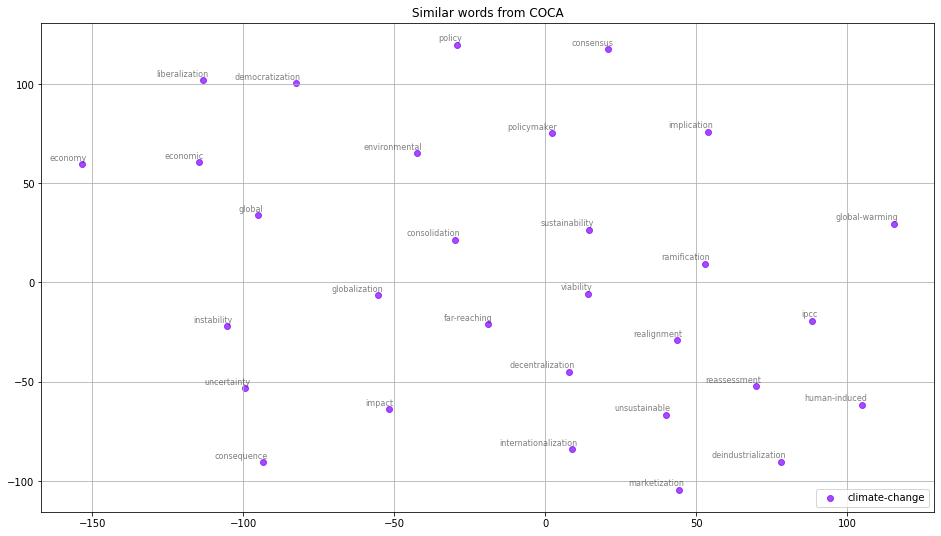

In [ ]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from COCA', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')